In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


In [55]:
# Carregar arquivo para um DataFrame

df_exames = pd.read_csv('./datasets/exames_diabets.csv')
df_exames.head()

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100


In [56]:
# Visualizar estrutura do DataFrame
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [57]:
df_exames['genero'].unique()

array(['M', 'F'], dtype=object)

In [58]:
# Remover coluna id_paciente

df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [59]:
df_exames.head()

,genero,idade,peso,altura,resultado
0,M,46,83,165,98
1,F,23,83,164,82
2,M,39,71,154,93
3,F,26,103,165,95
4,M,27,55,176,100


In [60]:
# One hot encoding da coluna genero
# O método get_dummies() converte a coluna genero em variáveis dummy
# O dtype é definido como int para que os valores sejam inteiros
# O resultado é que a coluna genero é convertida em duas colunas: genero_m e genero_f
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype=int)

In [61]:
df_exames.head()

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1


In [62]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   idade      100 non-null    int64
 1   peso       100 non-null    int64
 2   altura     100 non-null    int64
 3   resultado  100 non-null    int64
 4   genero_F   100 non-null    int64
 5   genero_M   100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB


<Axes: >

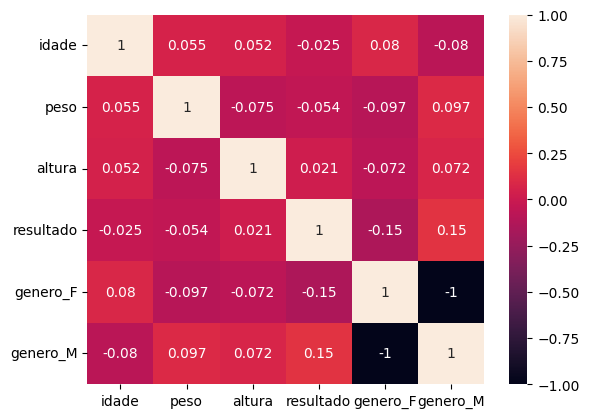

In [63]:
# Apresentar mapa de calor com correlação entre as variáveis
sns.heatmap(df_exames.corr(), vmin=-1, vmax=1,annot=True)
# Nenhum valor é maior que 0.5, o que indica que não há correlação entre as variáveis

<Axes: >

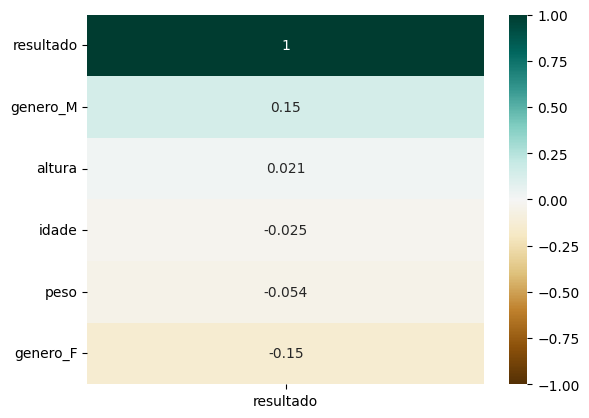

In [64]:
# Mapa de correlação só com a variável target (resultado)

sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


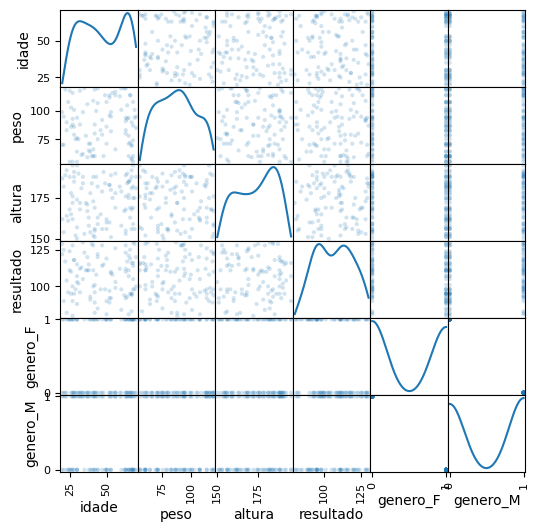

In [65]:
# Plot de Scatter (Dispersão) com Distribuição
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6,6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>, <Axes: >, <Axes: >]],
      dtype=object)

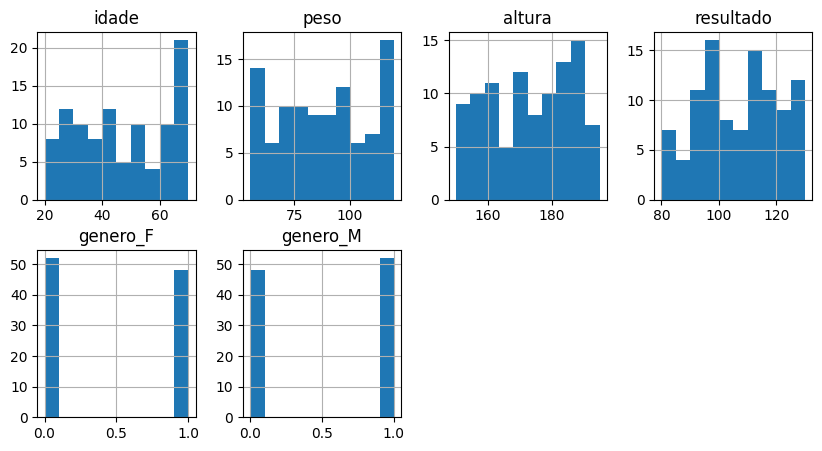

In [66]:
# Histograma de todas as variáveis
df_exames.hist(layout=(2,4), figsize=(10,5))

In [67]:
# Criar uma feature Nova
# IMC = peso / (altura * altura)
df_exames['imc'] = (df_exames['peso'] / ((df_exames['altura']/100) ** 2))
df_exames

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
...,...,...,...,...,...,...,...
95,52,96,183,89,1,0,28.666129
96,68,108,169,105,1,0,37.813802
97,21,95,154,125,0,1,40.057345
98,41,109,173,128,0,1,36.419526


array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>,
        <Axes: xlabel='imc', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>,
        <Axes

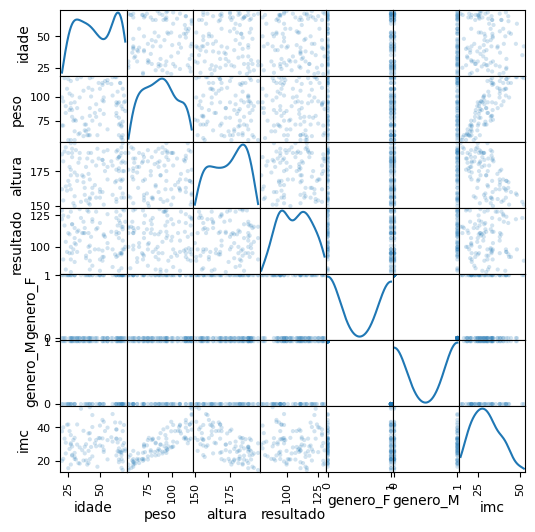

In [68]:
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6,6), diagonal='kde')

<Axes: >

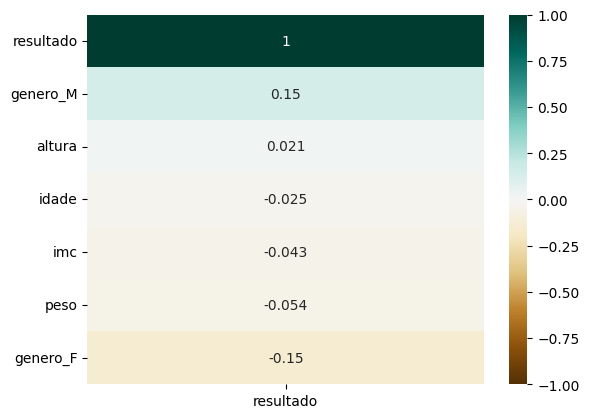

In [69]:
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [70]:
# Modelo 1 sem IMC
# Separar variáveis independentes e dependentes
X = df_exames.drop(columns=['imc', 'resultado'], axis=1)
y = df_exames['resultado']

In [71]:
X

,idade,peso,altura,genero_F,genero_M
0,46,83,165,0,1
1,23,83,164,1,0
2,39,71,154,0,1
3,26,103,165,1,0
4,27,55,176,0,1
...,...,...,...,...,...
95,52,96,183,1,0
96,68,108,169,1,0
97,21,95,154,0,1
98,41,109,173,0,1


In [72]:
y

0      98
1      82
2      93
3      95
4     100
     ... 
95     89
96    105
97    125
98    128
99     95
Name: resultado, Length: 100, dtype: int64

In [73]:
# Dividir conjunto entre treino e teste, o metodo train_test_split() retorna 4 variáveis
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.7, random_state=42)

In [74]:
len(X_train), len(X_test), len(y_train), len(y_test)

(30, 70, 30, 70)

In [75]:
# Treinar o algoritmo de Regressão Linear - Modelo 1
modelo1 = LinearRegression().fit(X_train, y_train)

In [76]:
# Gerar predições do conjunto de testes com base no modelo
y_pred = modelo1.predict(X_test)

In [77]:
y_pred

array([109.69241957, 119.44654197, 114.22415352, 105.08037092,
       109.43480411, 102.46862861, 123.22881528, 119.87207795,
       113.17514229, 106.76194075,  97.62027641, 114.58607656,
       114.80045017, 118.20520997, 121.78143059, 103.66794085,
       118.58051603, 111.08769278, 102.54505885, 100.29765773,
       104.12815331,  95.6801319 ,  97.04522798, 115.61454601,
       120.76274854, 101.39383985, 113.10577087, 109.86436922,
       105.58286284, 112.75386123, 113.40313246, 103.21914839,
       116.11470144, 125.69542614, 119.33537993, 121.78242668,
       101.7179013 , 121.78144903,  99.29586197, 103.26724933,
       107.83846657, 112.1373112 , 112.01662459, 111.9432165 ,
        94.17843286, 108.88555937, 114.62193051, 107.65857735,
       103.05254984, 126.380207  , 105.84129301, 103.07893155,
       101.12584052,  89.11672929, 112.74124076, 116.36569913,
       102.84075414, 101.88995859, 101.856478  ,  96.77611421,
       102.35384498, 111.05493473, 119.2958705 , 109.69

In [78]:
# r2_score - Conjunto de treinamento
modelo1.score(X_train, y_train)

0.17033759806599302

In [79]:
# r2_score - Conjunto de testes
modelo1.score(X_test, y_test)

-0.7170636286860603

In [80]:
# Mesmo valor do que o score anterior, calculado de outra forma
r2_score(y_test, y_pred)

-0.7170636286860603

In [81]:
# MAE - Erro médio absoluto
mean_absolute_error(y_test, y_pred)

13.893847897771197

In [82]:
# Treinar com o modelo 2 com IMC
X = pd.DataFrame(df_exames['imc'])
y = df_exames['resultado']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.7, random_state=42)

In [84]:
len(X_train), len(X_test), len(y_train), len(y_test)

(30, 70, 30, 70)

In [85]:
modelo2 = LinearRegression().fit(X_train, y_train)

In [86]:
y_pred = modelo2.predict(X_test)

In [87]:
y_pred

array([107.24966247, 107.37484539, 107.55853016, 106.4268573 ,
       108.07437918, 108.01387732, 106.99228978, 107.41416684,
       105.92790232, 107.19621931, 107.05373627, 106.37952757,
       107.61215768, 107.63426824, 106.98290643, 108.11457085,
       107.01839911, 106.29157136, 108.27285981, 106.67423401,
       107.28391324, 107.05371574, 106.95881618, 107.45648307,
       107.47694619, 107.93828809, 107.73031753, 106.66767737,
       107.5581423 , 108.0483562 , 108.20897862, 106.99337828,
       106.96644483, 107.19480829, 107.33402655, 107.53705108,
       107.02407445, 107.15820269, 106.97209103, 108.11699204,
       107.49349376, 105.97138121, 107.12152872, 107.3275452 ,
       107.29084608, 108.26044053, 106.30026865, 106.37952757,
       106.75317833, 107.05748289, 106.99292084, 106.6663016 ,
       107.63062259, 107.52206458, 107.7192744 , 106.51613846,
       107.87096851, 105.63059961, 107.98211973, 107.87998868,
       105.69756679, 107.6948723 , 106.66307883, 107.89

In [88]:
# r2_score - Conjunto de treinamento
modelo2.score(X_train, y_train)

0.0012445393646488556

In [89]:
# r2_score - Conjunto de testes
modelo2.score(X_test, y_test)

-0.00923290495462381

In [90]:
r2_score(y_test, y_pred)

-0.00923290495462381

In [91]:
mean_absolute_error(y_test, y_pred)

10.839602203589282

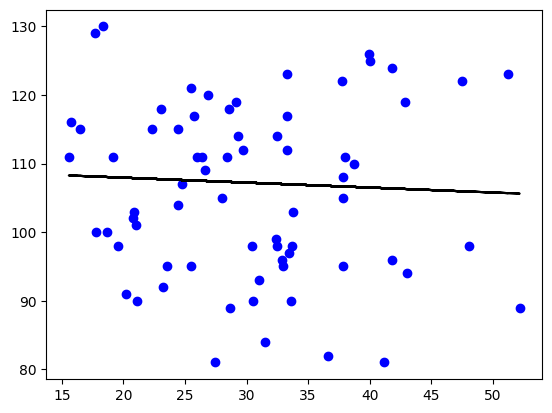

In [93]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='k')